In [1]:
# single

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 200,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 5
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\tcumi\github_repo\neural-network\python\activations.py:14: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-Xi))
C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.9567901234567902, Loss: 0.22393104765150282
Checkpoint 200, Accuracy: 0.9444444444444444, Loss: 0.20294470257229275
Checkpoint 300, Accuracy: 0.9506172839506173, Loss: 0.18880233058223017
Checkpoint 400, Accuracy: 0.9506172839506173, Loss: 0.17874544638174553
Checkpoint 500, Accuracy: 0.9506172839506173, Loss: 0.16359180874294704


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.98082316 0.01685607 0.00232071]
[1. 0. 0.] <-> [0.984335   0.00892919 0.00673573]
[1. 0. 0.] <-> [0.97820914 0.0195014  0.00228942]
[1. 0. 0.] <-> [0.95728797 0.00502212 0.03768996]
[1. 0. 0.] <-> [0.9813588  0.00870088 0.00994022]
[0. 0. 1.] <-> [8.2804292e-02 1.5529527e-04 9.1704041e-01]
[0. 1. 0.] <-> [0.6737821  0.32527068 0.0009472 ]
[1. 0. 0.] <-> [0.97363645 0.02504398 0.0013196 ]
[1. 0. 0.] <-> [0.9607455  0.03702014 0.00223435]
[1. 0. 0.] <-> [0.9454937  0.05324091 0.00126543]
[1. 0. 0.] <-> [0.9826685  0.0111166  0.00621474]
[1. 0. 0.] <-> [0.81476355 0.00315514 0.18208134]
[0. 0. 1.] <-> [0.90162903 0.00495618 0.09341479]
[0. 1. 0.] <-> [9.5126122e-02 9.0470660e-01 1.6728343e-04]
[1. 0. 0.] <-> [0.47422576 0.00117983 0.52459437]
[1. 0. 0.] <-> [0.94877654 0.00438408 0.04683931]
[0. 1. 0.] <-> [1.3311051e-01 8.6657482e-01 3.1463761e-04]
[1. 0. 0.] <-> [0.97620505 0.01832415 0.00547075]
[1. 0. 0.] <-> [0.97550356 0.01656337 0.00793303]
[0. 1. 0.] <-> [9.52332

In [12]:
# Testing Performance

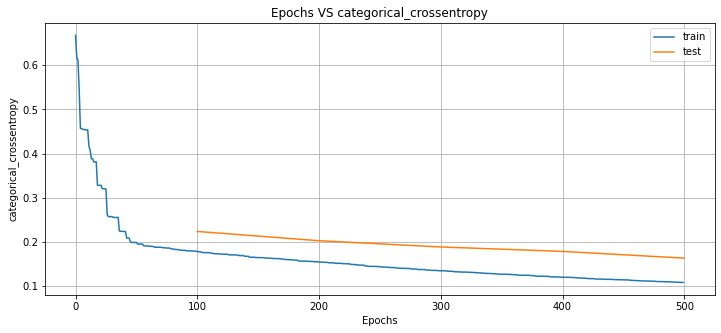

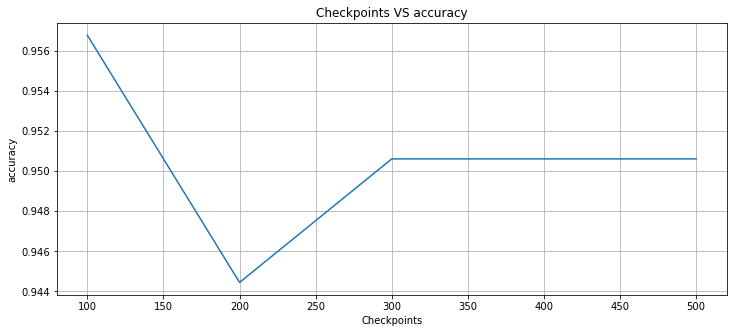

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9567901234567902, 'mean_square_error': 0.1170997057312514, 'categorical_crossentropy': 0.22393104765150282, 'precision': 0.9351851851851852, 'recall': 0.9351851851851852, 'f1': 0.9351851851851852, 'essential_metrics': {0: {'tp_hit': 75, 'fp_hit': 6, 'tn_hit': 26, 'fn_hit': 1}, 1: {'tp_hit': 14, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 3}, 2: {'tp_hit': 12, 'fp_hit': 1, 'tn_hit': 92, 'fn_hit': 3}}, 'checkpoint': 100} 


{'accuracy': 0.9444444444444444, 'mean_square_error': 0.10597500168228756, 'categorical_crossentropy': 0.20294470257229275, 'precision': 0.9166666666666666, 'recall': 0.9166666666666666, 'f1': 0.9166666666666666, 'essential_metrics': {0: {'tp_hit': 74, 'fp_hit': 7, 'tn_hit': 25, 'fn_hit': 2}, 1: {'tp_hit': 13, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 4}, 2: {'tp_hit': 12, 'fp_hit': 2, 'tn_hit': 91, 'fn_hit': 3}}, 'checkpoint': 200} 


{'accuracy': 0.9506172839506173, 'mean_square_error': 0.0998074874020668, 'categorical_crossentropy': 0.18880233058223017, 'precisi

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[ 0.32847655  3.         -0.633255   -0.133935   -2.0308704 ]
 bias: 1.260010004043579

Neuron 1: weights:
[ 0.52859217 -0.934181    0.36313877  1.2580159   2.8176446 ]
 bias: -1.1556142568588257

Neuron 2: weights:
[-2.7105541   2.5558832   1.8053474  -2.982564    0.71462464]
 bias: 1.5628525018692017

Neuron 3: weights:
[ 1.6277832 -2.6345413 -2.9171488 -1.5815593 -0.6678244]
 bias: 1.664939522743225

$
Layer 2
Neuron 0: weights:
[ 1.7371056  -2.5972419   0.47773507  2.963436  ]
 bias: 1.8628149032592773

Neuron 1: weights:
[ 2.3896925 -2.3414438  2.6840436 -3.       ]
 bias: 1.2561405897140503

Neuron 2: weights:
[ 0.00504302  1.752322   -2.9481292   2.2034497 ]
 bias: 0.6738000512123108

$

